In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [26]:
y = df['Exited']
X= df.drop(columns=['Exited'])

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape

(8000, 11)

In [30]:
x_test.shape

(2000, 11)

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_tran = scale.fit_transform(x_train)
x_test_tran = scale.transform(x_test)

In [32]:
x_train_tran

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [70]:
history = model.fit(x_train_tran,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3024 - accuracy: 0.8725 - val_loss: 0.3740 - val_accuracy: 0.8444
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3014 - accuracy: 0.8750 - val_loss: 0.3762 - val_accuracy: 0.8531
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3019 - accuracy: 0.8744 - val_loss: 0.3733 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.8730 - val_loss: 0.3743 - val_accuracy: 0.8506
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8753 - val_loss: 0.3743 - val_accuracy: 0.8450
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8745 - val_loss: 0.3752 - val_accuracy: 0.8512
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.8737 - val_loss: 0.3756 - val_accuracy: 0.8413

Epoch 58/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.8719 - val_loss: 0.3738 - val_accuracy: 0.8512
Epoch 59/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.8736 - val_loss: 0.3728 - val_accuracy: 0.8500
Epoch 60/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3023 - accuracy: 0.8722 - val_loss: 0.3753 - val_accuracy: 0.8500
Epoch 61/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3028 - accuracy: 0.8745 - val_loss: 0.3729 - val_accuracy: 0.8456
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.8719 - val_loss: 0.3746 - val_accuracy: 0.8425
Epoch 63/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3020 - accuracy: 0.8728 - val_loss: 0.3732 - val_accuracy: 0.8462
Epoch 64/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3018 - accuracy: 0.8747 - val_loss: 0.3755 - val_accuracy:

In [71]:
model.layers[0].get_weights()

[array([[ 1.12300888e-01,  3.62753212e-01,  5.47700047e-01,
         -1.57685131e-01, -2.79355079e-01, -4.31934446e-02,
          8.01657736e-02, -2.76581477e-02,  1.45690155e-03,
          1.10923266e-02, -5.74822068e-01],
        [-1.22036684e+00, -8.48233163e-01,  4.67588991e-01,
          1.05168566e-01, -1.23107147e+00, -8.89222264e-01,
         -1.91166723e+00,  5.16855061e-01,  1.35960305e+00,
         -1.43607676e+00,  4.15568382e-01],
        [ 2.01329455e-01,  4.50819314e-01, -2.20830411e-01,
          1.42621472e-01, -3.03743392e-01,  6.78084716e-02,
          7.99690112e-02,  9.28213224e-02,  2.74057329e-01,
          2.83849193e-03, -2.92948514e-01],
        [-1.95775311e-02,  5.07046767e-02, -9.13055241e-01,
          6.56474769e-01, -1.40591395e+00, -1.28757870e+00,
         -4.09655154e-01, -6.55259848e-01,  4.56261598e-02,
          3.13667089e-01, -7.04069674e-01],
        [-1.59020826e-01, -2.53310025e-01,  1.57115925e-02,
          2.00598454e+00,  4.08144087e-01, -

In [72]:
model.layers[1].get_weights()

[array([[-1.0131913 ,  1.137593  , -0.7601519 , -0.7545515 , -0.60303175,
          0.67693615,  0.26158452, -0.93947554, -0.22447905,  0.42875257,
         -0.19829473],
        [ 0.30758795, -0.3746124 , -0.27367052,  0.5019217 , -2.028733  ,
          0.93310857,  0.6748485 , -0.23774257,  0.49473003,  0.6448967 ,
          0.07069287],
        [ 0.3836872 ,  0.36656278,  1.3299983 ,  0.7421445 ,  0.24432388,
         -0.03776117,  1.4874389 ,  0.5810666 ,  0.44703308, -0.15839225,
          0.07799685],
        [ 1.8908212 ,  0.24564154,  0.06698664,  0.9250904 , -0.9496438 ,
         -0.48141083,  0.24535063, -0.12002707,  0.6926831 ,  0.34607434,
          0.25981742],
        [-0.4475886 , -0.22449923,  0.6485714 , -0.19814703, -1.838267  ,
         -0.27941877,  0.17177276,  1.4448769 , -0.8702518 ,  0.42950088,
         -1.7409335 ],
        [ 1.0495229 ,  0.4657249 , -0.335839  ,  0.71915025,  0.42889228,
         -0.9458396 ,  0.385931  ,  0.06312788,  1.073438  , -0.3317767

In [73]:
model.layers[2].get_weights()

[array([[ 1.4825715 ],
        [-0.653462  ],
        [ 0.9822489 ],
        [-0.7380181 ],
        [-0.6805481 ],
        [-0.41040733],
        [-0.45942688],
        [-0.7180344 ],
        [-0.63985044],
        [ 1.3441595 ],
        [-0.8467269 ]], dtype=float32),
 array([1.1512401], dtype=float32)]

In [74]:
y_log = model.predict(x_test_tran)

63/63 [==============================] - 0s 2ms/step


In [75]:
y_pred = np.where(y_log>0.5,1,0)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8635

In [77]:
history.history

{'loss': [0.30243584513664246,
  0.30137622356414795,
  0.3018869459629059,
  0.30238088965415955,
  0.3024864196777344,
  0.30253735184669495,
  0.3020797073841095,
  0.3024855852127075,
  0.3025171756744385,
  0.3024879992008209,
  0.3023746609687805,
  0.3025047779083252,
  0.3020572364330292,
  0.30259251594543457,
  0.30228960514068604,
  0.3024364709854126,
  0.3016802668571472,
  0.30192023515701294,
  0.30214545130729675,
  0.3017449676990509,
  0.3020751178264618,
  0.3024228811264038,
  0.3019561469554901,
  0.3021663427352905,
  0.30206573009490967,
  0.3025802969932556,
  0.3017551898956299,
  0.30242720246315,
  0.3019395172595978,
  0.30254366993904114,
  0.3019007742404938,
  0.30190309882164,
  0.3023754954338074,
  0.30186447501182556,
  0.3022761940956116,
  0.30205363035202026,
  0.3026096224784851,
  0.30273354053497314,
  0.30189430713653564,
  0.3020044267177582,
  0.3020794093608856,
  0.3017362952232361,
  0.3028765022754669,
  0.30248287320137024,
  0.302482664

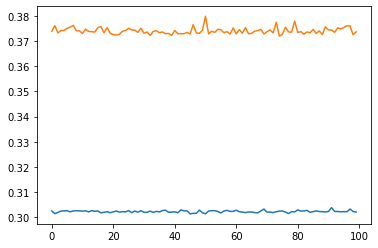

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

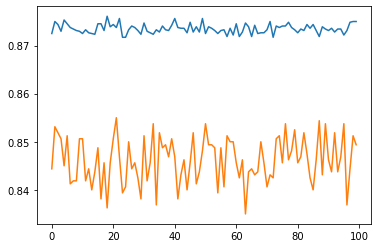

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])